# Import Libraries

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:

current_path = os.getcwd()
print("The current working directory is:", current_path)
 

The current working directory is: /Users/tamvo/Downloads/COS30082/lab03/Survival


# Load The Dataset

In [3]:
# Load the dataset
 
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Processing 1

In [5]:
# Preprocessing
# Encoding categorical data
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])  # Convert 'Sex' to numerical

df['Embarked'].fillna('S', inplace=True)  # Fill missing 'Embarked' with 'S' for Southampton
#df['Embarked'] = label_encoder.fit_transform(df['Embarked'])  # Convert 'Embarked' to numerical
df = pd.get_dummies(df, columns=['Embarked'])
# Convert True/False values to 0/1
df['Embarked_C'] = df['Embarked_C'].astype(int)
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)

# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)  # Replace missing 'Age' with median value

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


# Data Processing 2

### Cleaning Missing Values

In [7]:
df = df.dropna().reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
1,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
2,6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,0,0,1
3,10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,0,0,1
4,11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,0,0,1


### Removing redundant features

In [8]:
data = df.drop(columns=['index', 'PassengerId', 'Ticket', 'Name', 'Cabin'])
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,1,0,38.0,1,0,71.2833,1,0,0
1,1,1,0,35.0,1,0,53.1000,0,0,1
2,0,1,1,54.0,0,0,51.8625,0,0,1
3,1,3,0,4.0,1,1,16.7000,0,0,1
4,1,1,0,58.0,0,0,26.5500,0,0,1


### Drop the Embark Columns

In [9]:
data = data.drop(columns=['Embarked_C', 'Embarked_Q', 'Embarked_S'])

# EDA

### Plot the distribution of each feature

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,204.0,0.666667,0.472564,0.00,0.000000,1.00000,1.00000,1.0000
Pclass,204.0,1.196078,0.525961,1.00,1.000000,1.00000,1.00000,3.0000
Sex,204.0,0.524510,0.500627,0.00,0.000000,1.00000,1.00000,1.0000
Age,204.0,35.100098,15.100836,0.92,25.000000,34.00000,47.00000,80.0000
SibSp,204.0,0.441176,0.628918,0.00,0.000000,0.00000,1.00000,3.0000
Parch,204.0,0.436275,0.729976,0.00,0.000000,0.00000,1.00000,4.0000
Fare,204.0,76.141504,74.391749,0.00,29.453125,55.22085,89.32815,512.3292


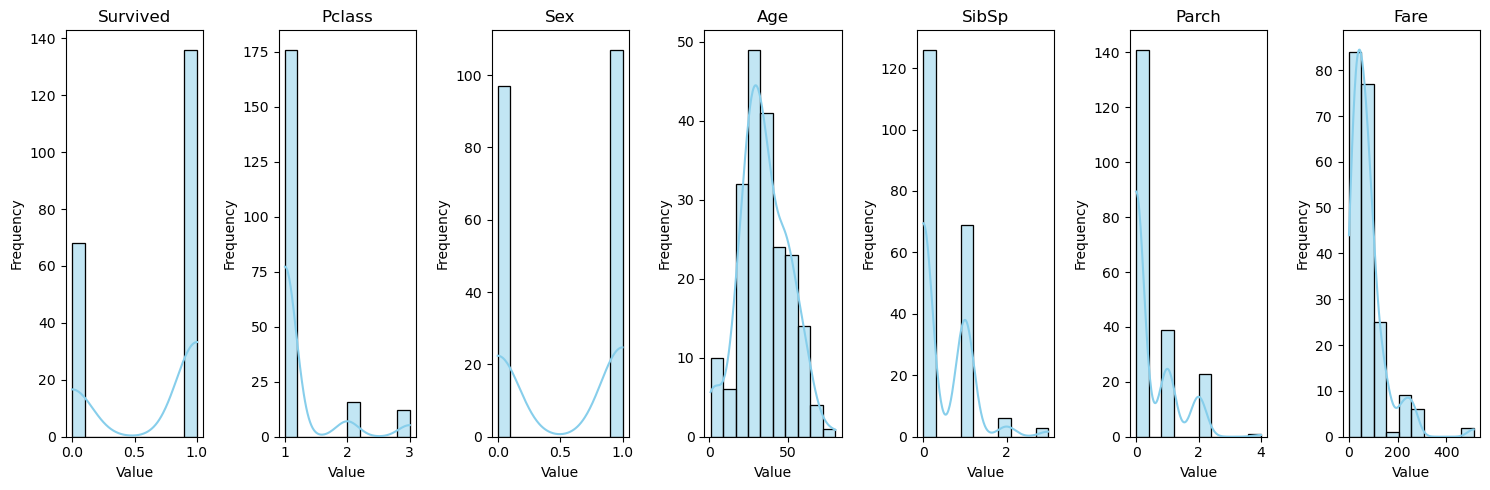

In [12]:
# Set the number of features
num_features = data.select_dtypes(include='number').shape[1]

# Create a single figure with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=num_features, figsize=(15, 5))

# Plotting the distribution for each feature in smaller axes
for i, column in enumerate(data.select_dtypes(include='number').columns):
    sns.histplot(data[column], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Correlation Matrix

<Axes: >

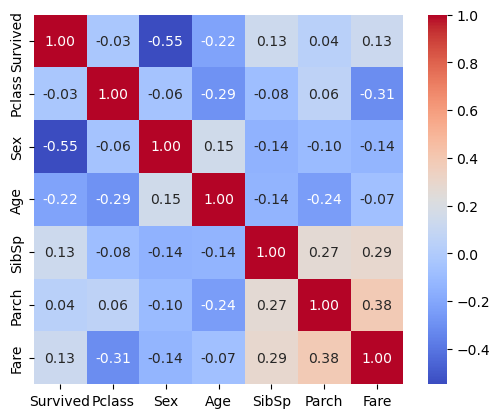

In [13]:

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)

# Training and Evaluation

### Split Dataset

In [19]:
features = data[['Age', 'Sex']]
X_train, X_test, Y_train, Y_test = train_test_split(features, data['Survived'], test_size=0.3, random_state=1)

### Define Model

In [22]:
clf = LogisticRegression(C=1e40, solver='newton-cg')

### Training

In [24]:
history = clf.fit(X_train, Y_train)

### Parameters

In [25]:
print(history.intercept_)
print(history.coef_)

[3.71717422]
[[-0.02862594 -3.11351667]]


### Evaluating

#### Accuracy

In [30]:
y_predict = clf.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_predict))

Accuracy: 0.7258064516129032


#### Confusion Matrix

                 Predicted Positive  Predicted Negative
Actual Positive                  15                   3
Actual Negative                  14                  30


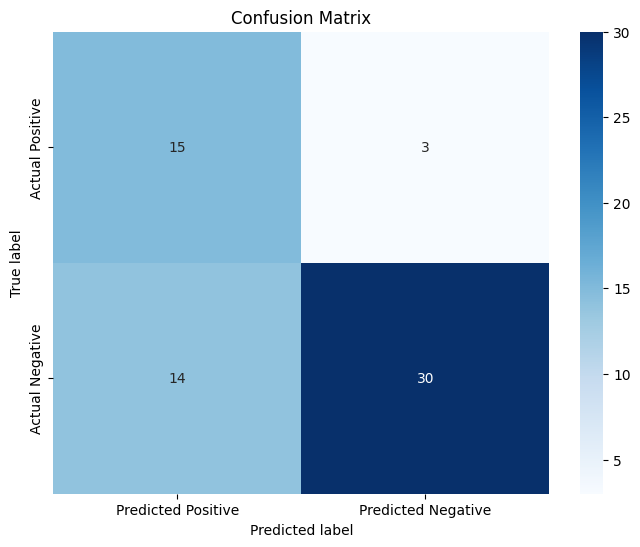

In [37]:
# Create confusion matrix
cm = confusion_matrix(Y_test, y_predict)

# Convert to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])

# Display the confusion matrix
print(cm_df)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

### Testing with my Dataframe

In [32]:
myData = {
    'Age': [10, 18, 30],
    'Sex': [1, 1, 1]
}
myDataFrame = pd.DataFrame(myData)

print(clf.predict(myDataFrame))

[1 1 0]


In [33]:
myData = {
    'Age': [10, 18, 30],
    'Sex': [0, 0, 0]
}
myDataFrame = pd.DataFrame(myData)

print(clf.predict(myDataFrame))

[1 1 1]


### Alter the training/testing split fraction and the maximum iteration 

#### Train/Test Split

In [10]:
features = data[['Age', 'Sex']]
X_train, X_test, Y_train, Y_test = train_test_split(
    features, data['Survived'], 
    test_size=0.4, 
    random_state=1
)

#### Models 

In [11]:
clf150 = LogisticRegression(C=1e40, solver='newton-cg', max_iter=150)
clf200 = LogisticRegression(C=1e40, solver='newton-cg', max_iter=250)
clf300 = LogisticRegression(C=1e40, solver='newton-cg', max_iter=300)

#### Results

In [12]:
clf150.fit(X_train, Y_train)
clf200.fit(X_train, Y_train)
clf300.fit(X_train, Y_train)

LogisticRegression(C=1e+40, max_iter=300, solver='newton-cg')

In [13]:
y150_predict = clf150.predict(X_test)
print("Accuracy for model 150:", accuracy_score(Y_test, y150_predict))

Accuracy for model 150: 0.7317073170731707


In [15]:
y200_predict = clf200.predict(X_test)
print("Accuracy for model 200:", accuracy_score(Y_test, y200_predict))

Accuracy for model 200: 0.7317073170731707


In [16]:
y300_predict = clf300.predict(X_test)
print("Accuracy for model 300:", accuracy_score(Y_test, y300_predict))

Accuracy for model 300: 0.7317073170731707
